<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/Payoff_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Upload your file in Colab
from google.colab import files
uploaded = files.upload()


Saving realistic_5G_security_dataset (1).csv to realistic_5G_security_dataset (1) (1).csv


In [3]:
# Step 2: Load the CSV
import pandas as pd

# Replace with your actual filename, or use list(uploaded.keys())[0]
df = pd.read_csv("realistic_5G_security_dataset (1).csv")

# Step 3: Show the first few rows
df.head()


,Incident_ID,CVE_ID,Threat_Type,CVSS_Score,Incident_Frequency_Yearly,Economic_Impact_kCAD,Downtime_Hours,Affected_Users_k,Affected_Component
0,INC-00001,CVE-2024-16795,DDoS,6.7,6,100,8,5,User Equipment (UE)
1,INC-00002,CVE-2022-77820,DDoS,5.0,3,1000,24,100,Radio Access Network (RAN)
2,INC-00003,CVE-2024-7265,Unauthorized Access,8.8,5,250,2,20,Radio Access Network (RAN)
3,INC-00004,CVE-2020-38194,Network Slice Breach,6.5,6,500,4,500,Multi-access Edge Computing (MEC)
4,INC-00005,CVE-2020-45131,DDoS,10.0,3,1000,2,20,Radio Access Network (RAN)


In [4]:
payoff_df.max()


NameError: name 'payoff_df' is not defined

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Payoff table (in thousands of CAD)
data = {
    'No_Investment': [-1000, -3000, -7000],   # losses under different threats
    'Basic_Firewall': [-500, -1500, -4000],
    'Advanced_AI_Security': [-200, -700, -1500]
}

states = ['Low Threat', 'Medium Threat', 'High Threat']

payoff_df = pd.DataFrame(data, index=states)
payoff_df


,No_Investment,Basic_Firewall,Advanced_AI_Security
Low Threat,-1000,-500,-200
Medium Threat,-3000,-1500,-700
High Threat,-7000,-4000,-1500


In [7]:
payoff_df.max()


,0
No_Investment,-1000
Basic_Firewall,-500
Advanced_AI_Security,-200


In [8]:
payoff_df.min()


,0
No_Investment,-7000
Basic_Firewall,-4000
Advanced_AI_Security,-1500


In [9]:
regret = payoff_df.max(axis=0) - payoff_df
regret.max()


,0
No_Investment,6000
Basic_Firewall,3500
Advanced_AI_Security,1300


In [10]:
# Assign probabilities to states
probabilities = np.array([0.5, 0.3, 0.2])  # adjust based on your domain

emv = payoff_df.mul(probabilities, axis=0).sum()
emv


,0
No_Investment,-2800.0
Basic_Firewall,-1500.0
Advanced_AI_Security,-610.0


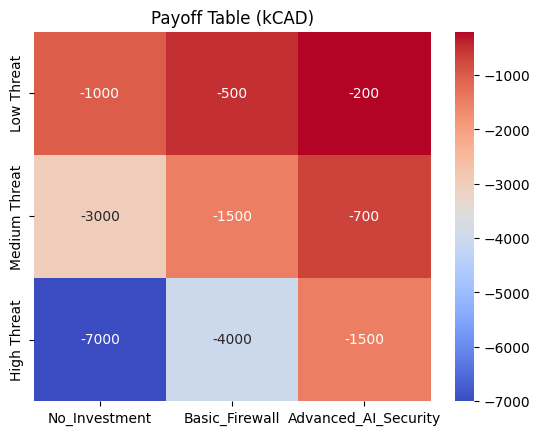

In [11]:
sns.heatmap(payoff_df, annot=True, cmap='coolwarm', fmt='d')
plt.title("Payoff Table (kCAD)")
plt.show()


In [12]:
!pip install anytree
from anytree import Node, RenderTree

# Create the decision tree structure
root = Node("Decision")

n1 = Node("No Investment", parent=root)
Node("Low Threat: -1000", parent=n1)
Node("Medium Threat: -3000", parent=n1)
Node("High Threat: -7000", parent=n1)

n2 = Node("Basic Firewall", parent=root)
Node("Low Threat: -500", parent=n2)
Node("Medium Threat: -1500", parent=n2)
Node("High Threat: -4000", parent=n2)

n3 = Node("Advanced AI Security", parent=root)
Node("Low Threat: -200", parent=n3)
Node("Medium Threat: -700", parent=n3)
Node("High Threat: -1500", parent=n3)

# Print the tree
for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.7 MB/s eta 0:00:00
Decision
├── No Investment
│   ├── Low Threat: -1000
│   ├── Medium Threat: -3000
│   └── High Threat: -7000
├── Basic Firewall
│   ├── Low Threat: -500
│   ├── Medium Threat: -1500
│   └── High Threat: -4000
└── Advanced AI Security
    ├── Low Threat: -200
    ├── Medium Threat: -700
    └── High Threat: -1500
